### MACHINE LEARNING MODELS FOR THE DIABETES DATASET K=2, t= 0.5

First of all, we will perform data curation and preparation. Next, we will apply the following Machine Learning models:

- Linear Regression
- k-Nearest Neighbors(k-NN)
- Support Vector Machines (SVM)
- Classification Trees
- Random Forest
- Ada Boosting
- Gradient Boosting
- Neural Networks(NN)

**Import the necessary libraries:**

In [1]:
import warnings
warnings.filterwarnings('ignore')
warnings.warn("ignore")
warnings.simplefilter('ignore')

In [2]:
import pandas as pd
import numpy as np

from sklearn.metrics import accuracy_score, classification_report, make_scorer, roc_curve, roc_auc_score, confusion_matrix, precision_score, recall_score, f1_score

from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

import matplotlib.pyplot as plt
#import shap
import matplotlib.pyplot as plt
import seaborn as sns

2023-07-07 12:31:07.057510: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-07 12:31:07.117981: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


**Set seeds for the different libraries that need it. To ensure reproducibility of the results**

In [3]:
random_seed = 14
np.random.seed(random_seed)
tf.random.set_seed(random_seed)

**We load the dataset and remove the anonymized data with the following function:**

In [4]:
file_name = "/home/carmen/Escritorio/TFM/ml_anonymization/datasets/diabetes_dataset/csv/diabetes_k_2_t0-5-anonymized.csv"
df = pd.read_csv(file_name, sep=",")

q_i=["Age","Gender","Polyuria","Polydipsia","sudden weight loss","weakness","Polyphagia","Genital thrush","visual blurring","Itching","Irritability","delayed healing","partial paresis","muscle stiffness","Alopecia","Obesity"]
a_s = ["class"]
def delete_rows(file_name, quasi_ident, fillna=True):
    """Delete the rows of the given file in which all QIs are set to *."""
    df = pd.read_csv(file_name, sep=",")
    df_qi = df[quasi_ident]
    row_mask = (df_qi == "*").all(axis=1)
    df_new = df[~row_mask].reset_index(drop=True)
    print(df_new)
    return df_new



new_dataset = delete_rows(file_name,q_i)

         Age  Gender Polyuria Polydipsia sudden weight loss weakness  \
0    [0, 80[  Female      Yes        Yes                Yes      Yes   
1    [0, 80[  Female      Yes        Yes                Yes      Yes   
2    [0, 80[    Male       No         No                 No      Yes   
3    [0, 80[    Male      Yes        Yes                Yes      Yes   
4    [0, 80[  Female      Yes        Yes                Yes      Yes   
..       ...     ...      ...        ...                ...      ...   
229  [0, 80[    Male      Yes        Yes                Yes      Yes   
230  [0, 80[    Male      Yes        Yes                 No       No   
231  [0, 80[  Female      Yes         No                Yes      Yes   
232  [0, 80[  Female       No         No                 No       No   
233  [0, 80[  Female      Yes        Yes                Yes      Yes   

    Polyphagia Genital thrush visual blurring Itching Irritability  \
0          Yes             No              No      No           N

**We explore the new dataset**

In [5]:
print(df.head())
print(df.info())
print(df.describe())
print(df.shape)

       Age  Gender Polyuria Polydipsia sudden weight loss weakness Polyphagia  \
0  [0, 80[  Female      Yes        Yes                Yes      Yes        Yes   
1        *       *        *          *                  *        *          *   
2  [0, 80[  Female      Yes        Yes                Yes      Yes        Yes   
3        *       *        *          *                  *        *          *   
4        *       *        *          *                  *        *          *   

  Genital thrush visual blurring Itching Irritability delayed healing  \
0             No              No      No           No              No   
1              *               *       *            *               *   
2             No              No     Yes          Yes              No   
3              *               *       *            *               *   
4              *               *       *            *               *   

  partial paresis muscle stiffness Alopecia Obesity     class  
0         

**Check if there is any data that is null to eliminate it, if it exists:**

In [6]:
df.isnull().sum()

Age                   0
Gender                0
Polyuria              0
Polydipsia            0
sudden weight loss    0
weakness              0
Polyphagia            0
Genital thrush        0
visual blurring       0
Itching               0
Irritability          0
delayed healing       0
partial paresis       0
muscle stiffness      0
Alopecia              0
Obesity               0
class                 0
dtype: int64

**Eliminate duplicate data if any**

In [7]:
df.drop_duplicates(inplace=True)

**Convert categorical variables to factors:**

In [8]:
df["Age"] = df["Age"].astype("category").cat.codes
df["Gender"] = df["Gender"].astype("category").cat.codes
df["Polyuria"] = df["Polyuria"].astype("category").cat.codes
df["Polydipsia"] = df["Polydipsia"].astype("category").cat.codes
df["sudden weight loss"] = df["sudden weight loss"].astype("category").cat.codes  
df["weakness"] = df["weakness"].astype("category").cat.codes
df["Polyphagia"] = df["Polyphagia"].astype("category").cat.codes
df["Genital thrush"] = df["Genital thrush"].astype("category").cat.codes


df["visual blurring"] = df["visual blurring"].astype("category").cat.codes
df["Itching"] = df["Itching"].astype("category").cat.codes
df["Irritability"] = df["Irritability"].astype("category").cat.codes
df["delayed healing"] = df["delayed healing"].astype("category").cat.codes
df["partial paresis"] = df["partial paresis"].astype("category").cat.codes  
df["muscle stiffness"] = df["muscle stiffness"].astype("category").cat.codes
df["Alopecia"] = df["Alopecia"].astype("category").cat.codes
df["Obesity"] = df["Obesity"].astype("category").cat.codes

df["class"] = df["class"].astype("category").cat.codes

In [9]:
df.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,1,1,2,2,2,2,2,1,1,1,1,1,2,1,1,1,1
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,1,2,2,2,2,2,1,1,2,2,1,2,2,1,1,1
6,1,2,1,1,1,2,2,1,1,1,2,1,1,2,1,1,1
7,1,2,2,2,2,2,2,1,2,1,1,1,2,1,1,1,1


In [10]:
frecuencia_valores = df['class'].value_counts()
frecuencia_valores

class
1    73
0     2
Name: count, dtype: int64

As the only option for the age value to be 0 is because it had a * as a value before the change to categorical variables, I perform the following elimination. In this way, I manage to delete anonymised records if any have not been deleted correctly.

In [11]:
def delete_rows_with_zero_age(df):
    """Elimina las filas del DataFrame dado en las que el campo 'age' tiene valor 0."""
    df_new = df[df['Age'] != 0].reset_index(drop=True)
    return df_new

df_new = delete_rows_with_zero_age(df)
df_new.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,1,1,2,2,2,2,2,1,1,1,1,1,2,1,1,1,1
1,1,1,2,2,2,2,2,1,1,2,2,1,2,2,1,1,1
2,1,2,1,1,1,2,2,1,1,1,2,1,1,2,1,1,1
3,1,2,2,2,2,2,2,1,2,1,1,1,2,1,1,1,1
4,1,1,2,2,2,2,1,1,2,1,1,1,2,1,1,2,1


**Next, we must do the scaling on train, we apply it, and we do the scaling again on test. We split the dataset into train and test**

In [12]:
X = df.drop(["class"], axis=1)
y = df["class"]

# We add stratify for making sure that the random split has 25% of 0's and 75% of 1's.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=np.random.seed(random_seed), stratify=y)

In [13]:
scaler = MinMaxScaler()
scaler = scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

**We check that the shapes of the splitted sets are correct as expected**

In [14]:
print("X_train shape:",X_train.shape)
print("X_test shape:",X_test.shape)
print("y_train:",y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (56, 16)
X_test shape: (19, 16)
y_train: (56,)
y_test shape: (19,)


### LOGISTIC REGRESSION:  
#### Linear regression method for binary classification problems

 We create and train the logistic regression model

In [15]:
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)

LogisticRegression()

We make the predictions on the test partition:

In [16]:
y_pred_lr = model_lr.predict(X_test)

We evaluate the model obtained:

In [17]:
accuracy_lr = accuracy_score(y_test, y_pred_lr)
report_lr = classification_report(y_test, y_pred_lr)
print("Accuracy:", accuracy_lr)
print("Classification Report:\n", report_lr)

Accuracy: 0.9473684210526315
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.95      1.00      0.97        18

    accuracy                           0.95        19
   macro avg       0.47      0.50      0.49        19
weighted avg       0.90      0.95      0.92        19



In [18]:
y_pred_prob_logistic = model_lr.predict_proba(X_test)[:, 1]
auc_logistic = roc_auc_score(y_test, y_pred_prob_logistic)

print("AUC:", auc_logistic)


AUC: 0.9444444444444444


### KNN

We choose the different parameters for gridSearch

In [19]:
param_grid_knn = {'n_neighbors': [3, 5, 7, 9, 11],
              'weights': ['uniform', 'distance'],
              'algorithm': ['ball_tree', 'kd_tree', 'brute']}

We create the classifier

In [20]:
knn = KNeighborsClassifier()

We create the GridSearch object

In [21]:
# refit equals true, to train with all the data
grid_search_knn = GridSearchCV(knn, param_grid_knn, cv=5, refit=True)

We make the model fit

In [22]:
grid_search_knn.fit(X_train, y_train)

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7fa99428e440>
Traceback (most recent call last):
  File "/home/carmen/mambaforge/envs/TFM/lib/python3.10/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/carmen/mambaforge/envs/TFM/lib/python3.10/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/carmen/mambaforge/envs/TFM/lib/python3.10/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/carmen/mambaforge/envs/TFM/lib/python3.10/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._fi

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7fa99428e440>
Traceback (most recent call last):
  File "/home/carmen/mambaforge/envs/TFM/lib/python3.10/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/carmen/mambaforge/envs/TFM/lib/python3.10/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/carmen/mambaforge/envs/TFM/lib/python3.10/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/carmen/mambaforge/envs/TFM/lib/python3.10/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._fi

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7fa99428cca0>
Traceback (most recent call last):
  File "/home/carmen/mambaforge/envs/TFM/lib/python3.10/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/carmen/mambaforge/envs/TFM/lib/python3.10/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/carmen/mambaforge/envs/TFM/lib/python3.10/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/carmen/mambaforge/envs/TFM/lib/python3.10/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._fi

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7fa99428cca0>
Traceback (most recent call last):
  File "/home/carmen/mambaforge/envs/TFM/lib/python3.10/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/carmen/mambaforge/envs/TFM/lib/python3.10/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/carmen/mambaforge/envs/TFM/lib/python3.10/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/carmen/mambaforge/envs/TFM/lib/python3.10/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._fi

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7fa99428e440>
Traceback (most recent call last):
  File "/home/carmen/mambaforge/envs/TFM/lib/python3.10/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/carmen/mambaforge/envs/TFM/lib/python3.10/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/carmen/mambaforge/envs/TFM/lib/python3.10/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/carmen/mambaforge/envs/TFM/lib/python3.10/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._fi

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7fa99428cca0>
Traceback (most recent call last):
  File "/home/carmen/mambaforge/envs/TFM/lib/python3.10/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/carmen/mambaforge/envs/TFM/lib/python3.10/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/carmen/mambaforge/envs/TFM/lib/python3.10/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/carmen/mambaforge/envs/TFM/lib/python3.10/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._fi

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [3, 5, 7, 9, 11],
                         'weights': ['uniform', 'distance']})

In [23]:
print("Best hyperparameters:", grid_search_knn.best_params_)
print("Accuracy score:", grid_search_knn.best_score_)

Best hyperparameters: {'algorithm': 'ball_tree', 'n_neighbors': 3, 'weights': 'uniform'}
Accuracy score: 0.9833333333333332


Get the best model and its predictions

In [24]:
best_model_knn = grid_search_knn.best_estimator_
y_pred_knn = best_model_knn.predict(X_test)

Evaluate the best model over test partition

In [25]:
accuracy_knn = accuracy_score(y_test, y_pred_knn)
report_knn = classification_report(y_test, y_pred_knn)
print("Best Parameters:", grid_search_knn.best_params_)
print("Accuracy:", accuracy_knn)
print("Classification Report:\n", report_knn)

Best Parameters: {'algorithm': 'ball_tree', 'n_neighbors': 3, 'weights': 'uniform'}
Accuracy: 0.9473684210526315
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.95      1.00      0.97        18

    accuracy                           0.95        19
   macro avg       0.47      0.50      0.49        19
weighted avg       0.90      0.95      0.92        19



In [26]:
y_pred_prob_knn = best_model_knn.predict_proba(X_test)[:, 1]
auc_knn = roc_auc_score(y_test, y_pred_prob_knn)

print("AUC:", auc_knn)

AUC: 0.4722222222222222


### CLASSIFICATION TREES

We choose the different parameters for gridSearch

In [27]:
param_grid_ct = {'max_depth': [3, 5, 7, 9, None],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4]}

We create the model classifier

In [28]:
model_ct = DecisionTreeClassifier(random_state=random_seed)

We create the GridSearch object

In [29]:
grid_search_ct = GridSearchCV(model_ct, param_grid_ct, cv=5)

We make the model fit

In [30]:
grid_search_ct.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=14),
             param_grid={'max_depth': [3, 5, 7, 9, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]})

We obtain and store the best model and the prediction

In [31]:
best_model_ct = grid_search_ct.best_estimator_
y_pred_ct = best_model_ct.predict(X_test)

Evaluate the best model

In [32]:
accuracy_ct = accuracy_score(y_test, y_pred_ct)
report_ct = classification_report(y_test, y_pred_ct)
print("Best Parameters:", grid_search_ct.best_params_)
print("Accuracy:", accuracy_ct)
print("Classification Report:\n", report_ct)

Best Parameters: {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
Accuracy: 0.8947368421052632
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.94      0.94      0.94        18

    accuracy                           0.89        19
   macro avg       0.47      0.47      0.47        19
weighted avg       0.89      0.89      0.89        19



In [33]:
y_pred_prob_ct = best_model_ct.predict_proba(X_test)[:, 1]
auc_ct = roc_auc_score(y_test, y_pred_prob_ct)

print("AUC:", auc_ct)


AUC: 0.4722222222222222


### RANDOM FOREST

We choose the different parameters for gridSearch

In [34]:
param_grid_rf = {"n_estimators": [50, 100, 200],
              "max_depth": [None, 5, 10],
              "min_samples_split": [2, 5, 10],
              "min_samples_leaf": [1, 2, 4]}

We create the classifier

In [35]:
rfc = RandomForestClassifier(random_state=random_seed)

We create the GridSearch object

In [36]:
grid_search_rf = GridSearchCV(rfc, param_grid_rf, cv=5)

We make the model fit

In [37]:
grid_search_rf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=14),
             param_grid={'max_depth': [None, 5, 10],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]})

In [38]:
print("Best hyperparameters:", grid_search_rf.best_params_)
print("Accuracy score:", grid_search_rf.best_score_)

Best hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Accuracy score: 0.9833333333333332


In [39]:
best_model_rf = grid_search_rf.best_estimator_
y_pred_rf = best_model_rf.predict(X_test)

In [40]:
accuracy_rf = accuracy_score(y_test, y_pred_rf)
report_rf = classification_report(y_test, y_pred_rf)
print("Best Parameters:", grid_search_rf.best_params_)
print("Accuracy:", accuracy_rf)
print("Classification Report:\n", report_rf)

Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Accuracy: 0.8947368421052632
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.94      0.94      0.94        18

    accuracy                           0.89        19
   macro avg       0.47      0.47      0.47        19
weighted avg       0.89      0.89      0.89        19



In [41]:
y_pred_prob_rf = best_model_rf.predict_proba(X_test)[:, 1]
auc_rf = roc_auc_score(y_test, y_pred_prob_rf)

print("AUC:", auc_rf)

AUC: 0.4722222222222222


### SVM (Support Vector Machine)

In [42]:
param_grid_svm = {"C": [0.1, 0.25, 0.5, 0.75, 1, 2],
              "kernel": ["linear", "poly", "rbf", "sigmoid"],
              "gamma": ["scale", "auto"]}

In [43]:
svm = SVC(random_state=random_seed)

In [44]:
grid_search_svm = GridSearchCV(svm, param_grid_svm, cv=5)

In [45]:
grid_search_svm.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(random_state=14),
             param_grid={'C': [0.1, 0.25, 0.5, 0.75, 1, 2],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']})

In [46]:
print("Best hyperparameters:", grid_search_svm.best_params_)
print("Accuracy score:", grid_search_svm.best_score_)

Best hyperparameters: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
Accuracy score: nan


In [47]:
best_model_svm = grid_search_svm.best_estimator_
y_pred_svm = best_model_svm.predict(X_test)

In [48]:
accuracy_svm = accuracy_score(y_test, y_pred_svm)
report_svm = classification_report(y_test, y_pred_svm)
print("Best Parameters:", grid_search_svm.best_params_)
print("Accuracy:", accuracy_svm)
print("Classification Report:\n", report_svm)

Best Parameters: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
Accuracy: 0.9473684210526315
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.95      1.00      0.97        18

    accuracy                           0.95        19
   macro avg       0.47      0.50      0.49        19
weighted avg       0.90      0.95      0.92        19



In [49]:
y_pred_prob_svm = best_model_svm.decision_function(X_test)
auc_svm = roc_auc_score(y_test, y_pred_prob_svm)

print("AUC:", auc_svm)

AUC: 0.9444444444444444


### NEURAL NETWORK:

We start creating the model function

In [50]:
def create_model_nn(hidden_units=128):
    model = Sequential()
    model.add(Dense(hidden_units, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Define the parameter grid
param_grid_nn = {
    'hidden_units': [64, 128, 256],
    'epochs': [10, 20, 30],
    'batch_size': [16, 32, 64]
}

# Create the model
model_nn = tf.keras.wrappers.scikit_learn.KerasClassifier(build_fn=create_model_nn)

# Perform grid search
grid_search_nn = GridSearchCV(model_nn, param_grid_nn, cv=3)
grid_search_nn.fit(X_train, y_train)

# Get the best parameters
best_params_nn = grid_search_nn.best_params_
best_params_nn

Epoch 1/10


2023-07-07 12:31:57.295770: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


3/3 [==============================] - 0s 4ms/step - loss: 0.5855 - accuracy: 0.9730
Epoch 2/10
3/3 [==============================] - 0s 2ms/step - loss: 0.4842 - accuracy: 0.9730
Epoch 3/10
3/3 [==============================] - 0s 2ms/step - loss: 0.3894 - accuracy: 0.9730
Epoch 4/10
3/3 [==============================] - 0s 3ms/step - loss: 0.2973 - accuracy: 0.9730
Epoch 5/10
3/3 [==============================] - 0s 2ms/step - loss: 0.2160 - accuracy: 0.9730
Epoch 6/10
3/3 [==============================] - 0s 2ms/step - loss: 0.1489 - accuracy: 0.9730
Epoch 7/10
3/3 [==============================] - 0s 2ms/step - loss: 0.0998 - accuracy: 0.9730
Epoch 8/10
3/3 [==============================] - 0s 2ms/step - loss: 0.0684 - accuracy: 0.9730
Epoch 9/10
3/3 [==============================] - 0s 2ms/step - loss: 0.0500 - accuracy: 0.9730
Epoch 10/10
2/2 [==============================] - 0s 3ms/step - loss: 0.0075 - accuracy: 1.0000
Epoch 1/10
3/3 [==============================] - 

3/3 [==============================] - 0s 2ms/step - loss: 0.1465 - accuracy: 0.9730
Epoch 7/10
3/3 [==============================] - 0s 2ms/step - loss: 0.0923 - accuracy: 0.9730
Epoch 8/10
3/3 [==============================] - 0s 2ms/step - loss: 0.0599 - accuracy: 0.9730
Epoch 9/10
3/3 [==============================] - 0s 2ms/step - loss: 0.0429 - accuracy: 0.9730
Epoch 10/10
2/2 [==============================] - 0s 3ms/step - loss: 0.0056 - accuracy: 1.0000
Epoch 1/10
3/3 [==============================] - 0s 2ms/step - loss: 0.5628 - accuracy: 1.0000
Epoch 2/10
3/3 [==============================] - 0s 2ms/step - loss: 0.3608 - accuracy: 1.0000
Epoch 3/10
3/3 [==============================] - 0s 2ms/step - loss: 0.2224 - accuracy: 1.0000
Epoch 4/10
3/3 [==============================] - 0s 2ms/step - loss: 0.1209 - accuracy: 1.0000
Epoch 5/10
3/3 [==============================] - 0s 2ms/step - loss: 0.0584 - accuracy: 1.0000
Epoch 6/10
3/3 [==============================] - 

3/3 [==============================] - 0s 2ms/step - loss: 0.0304 - accuracy: 0.9737
Epoch 17/20
3/3 [==============================] - 0s 2ms/step - loss: 0.0291 - accuracy: 0.9737
Epoch 18/20
3/3 [==============================] - 0s 2ms/step - loss: 0.0280 - accuracy: 0.9737
Epoch 19/20
3/3 [==============================] - 0s 2ms/step - loss: 0.0272 - accuracy: 0.9737
Epoch 20/20
2/2 [==============================] - 0s 2ms/step - loss: 0.0035 - accuracy: 1.0000
Epoch 1/20
3/3 [==============================] - 0s 2ms/step - loss: 0.6505 - accuracy: 0.9459
Epoch 2/20
3/3 [==============================] - 0s 2ms/step - loss: 0.5386 - accuracy: 0.9730
Epoch 3/20
3/3 [==============================] - 0s 2ms/step - loss: 0.4574 - accuracy: 0.9730
Epoch 4/20
3/3 [==============================] - 0s 2ms/step - loss: 0.3783 - accuracy: 0.9730
Epoch 5/20
3/3 [==============================] - 0s 2ms/step - loss: 0.2998 - accuracy: 0.9730
Epoch 6/20
3/3 [==============================]

3/3 [==============================] - 0s 2ms/step - loss: 0.0237 - accuracy: 0.9730
Epoch 18/20
3/3 [==============================] - 0s 2ms/step - loss: 0.0235 - accuracy: 0.9730
Epoch 19/20
3/3 [==============================] - 0s 2ms/step - loss: 0.0230 - accuracy: 0.9730
Epoch 20/20
2/2 [==============================] - 0s 3ms/step - loss: 3.6874e-04 - accuracy: 1.0000
Epoch 1/20
3/3 [==============================] - 0s 2ms/step - loss: 0.5467 - accuracy: 1.0000
Epoch 2/20
3/3 [==============================] - 0s 3ms/step - loss: 0.3192 - accuracy: 1.0000
Epoch 3/20
3/3 [==============================] - 0s 2ms/step - loss: 0.1712 - accuracy: 1.0000
Epoch 4/20
3/3 [==============================] - 0s 2ms/step - loss: 0.0810 - accuracy: 1.0000
Epoch 5/20
3/3 [==============================] - 0s 2ms/step - loss: 0.0349 - accuracy: 1.0000
Epoch 6/20
3/3 [==============================] - 0s 2ms/step - loss: 0.0146 - accuracy: 1.0000
Epoch 7/20
3/3 [============================

3/3 [==============================] - 0s 2ms/step - loss: 0.1861 - accuracy: 1.0000
Epoch 8/30
3/3 [==============================] - 0s 2ms/step - loss: 0.1328 - accuracy: 1.0000
Epoch 9/30
3/3 [==============================] - 0s 2ms/step - loss: 0.0907 - accuracy: 1.0000
Epoch 10/30
3/3 [==============================] - 0s 2ms/step - loss: 0.0602 - accuracy: 1.0000
Epoch 11/30
3/3 [==============================] - 0s 2ms/step - loss: 0.0394 - accuracy: 1.0000
Epoch 12/30
3/3 [==============================] - 0s 2ms/step - loss: 0.0255 - accuracy: 1.0000
Epoch 13/30
3/3 [==============================] - 0s 2ms/step - loss: 0.0169 - accuracy: 1.0000
Epoch 14/30
3/3 [==============================] - 0s 2ms/step - loss: 0.0116 - accuracy: 1.0000
Epoch 15/30
3/3 [==============================] - 0s 2ms/step - loss: 0.0082 - accuracy: 1.0000
Epoch 16/30
3/3 [==============================] - 0s 2ms/step - loss: 0.0061 - accuracy: 1.0000
Epoch 17/30
3/3 [===========================

3/3 [==============================] - 0s 2ms/step - loss: 0.0210 - accuracy: 0.9730
Epoch 30/30
2/2 [==============================] - 0s 2ms/step - loss: 3.7253e-04 - accuracy: 1.0000
Epoch 1/30
3/3 [==============================] - 0s 2ms/step - loss: 0.5700 - accuracy: 1.0000
Epoch 2/30
3/3 [==============================] - 0s 2ms/step - loss: 0.4204 - accuracy: 1.0000
Epoch 3/30
3/3 [==============================] - 0s 2ms/step - loss: 0.2954 - accuracy: 1.0000
Epoch 4/30
3/3 [==============================] - 0s 2ms/step - loss: 0.1913 - accuracy: 1.0000
Epoch 5/30
3/3 [==============================] - 0s 2ms/step - loss: 0.1168 - accuracy: 1.0000
Epoch 6/30
3/3 [==============================] - 0s 2ms/step - loss: 0.0680 - accuracy: 1.0000
Epoch 7/30
3/3 [==============================] - 0s 2ms/step - loss: 0.0384 - accuracy: 1.0000
Epoch 8/30
3/3 [==============================] - 0s 2ms/step - loss: 0.0213 - accuracy: 1.0000
Epoch 9/30
3/3 [==============================

3/3 [==============================] - 0s 2ms/step - loss: 0.0225 - accuracy: 0.9730
Epoch 21/30
3/3 [==============================] - 0s 2ms/step - loss: 0.0221 - accuracy: 0.9730
Epoch 22/30
3/3 [==============================] - 0s 2ms/step - loss: 0.0217 - accuracy: 0.9730
Epoch 23/30
3/3 [==============================] - 0s 2ms/step - loss: 0.0213 - accuracy: 0.9730
Epoch 24/30
3/3 [==============================] - 0s 2ms/step - loss: 0.0207 - accuracy: 0.9730
Epoch 25/30
3/3 [==============================] - 0s 2ms/step - loss: 0.0202 - accuracy: 0.9730
Epoch 26/30
3/3 [==============================] - 0s 2ms/step - loss: 0.0198 - accuracy: 0.9730
Epoch 27/30
3/3 [==============================] - 0s 2ms/step - loss: 0.0194 - accuracy: 0.9730
Epoch 28/30
3/3 [==============================] - 0s 2ms/step - loss: 0.0190 - accuracy: 1.0000
Epoch 29/30
3/3 [==============================] - 0s 2ms/step - loss: 0.0188 - accuracy: 1.0000
Epoch 30/30
2/2 [=========================

1/1 [==============================] - 0s 65ms/step - loss: 0.1893 - accuracy: 1.0000
Epoch 1/10
2/2 [==============================] - 0s 3ms/step - loss: 0.5004 - accuracy: 1.0000
Epoch 2/10
2/2 [==============================] - 0s 3ms/step - loss: 0.4176 - accuracy: 1.0000
Epoch 3/10
2/2 [==============================] - 0s 3ms/step - loss: 0.3421 - accuracy: 1.0000
Epoch 4/10
2/2 [==============================] - 0s 2ms/step - loss: 0.2738 - accuracy: 1.0000
Epoch 5/10
2/2 [==============================] - 0s 2ms/step - loss: 0.2141 - accuracy: 1.0000
Epoch 6/10
2/2 [==============================] - 0s 3ms/step - loss: 0.1627 - accuracy: 1.0000
Epoch 7/10
2/2 [==============================] - 0s 2ms/step - loss: 0.1199 - accuracy: 1.0000
Epoch 8/10
2/2 [==============================] - 0s 2ms/step - loss: 0.0862 - accuracy: 1.0000
Epoch 9/10
2/2 [==============================] - 0s 3ms/step - loss: 0.0607 - accuracy: 1.0000
Epoch 10/10
1/1 [==============================] -

2/2 [==============================] - 0s 3ms/step - loss: 0.0958 - accuracy: 0.9737
Epoch 10/10
1/1 [==============================] - 0s 61ms/step - loss: 0.0365 - accuracy: 1.0000
Epoch 1/20
2/2 [==============================] - 0s 3ms/step - loss: 0.8352 - accuracy: 0.0270
Epoch 2/20
2/2 [==============================] - 0s 3ms/step - loss: 0.7217 - accuracy: 0.2162
Epoch 3/20
2/2 [==============================] - 0s 2ms/step - loss: 0.6294 - accuracy: 0.9459
Epoch 4/20
2/2 [==============================] - 0s 3ms/step - loss: 0.5620 - accuracy: 0.9730
Epoch 5/20
2/2 [==============================] - 0s 3ms/step - loss: 0.5174 - accuracy: 0.9730
Epoch 6/20
2/2 [==============================] - 0s 2ms/step - loss: 0.4815 - accuracy: 0.9730
Epoch 7/20
2/2 [==============================] - 0s 3ms/step - loss: 0.4452 - accuracy: 0.9730
Epoch 8/20
2/2 [==============================] - 0s 3ms/step - loss: 0.4078 - accuracy: 0.9730
Epoch 9/20
2/2 [==============================] -

1/1 [==============================] - 0s 61ms/step - loss: 0.0013 - accuracy: 1.0000
Epoch 1/20
2/2 [==============================] - 0s 2ms/step - loss: 0.6743 - accuracy: 0.7568
Epoch 2/20
2/2 [==============================] - 0s 3ms/step - loss: 0.5587 - accuracy: 1.0000
Epoch 3/20
2/2 [==============================] - 0s 4ms/step - loss: 0.4654 - accuracy: 1.0000
Epoch 4/20
2/2 [==============================] - 0s 2ms/step - loss: 0.3878 - accuracy: 1.0000
Epoch 5/20
2/2 [==============================] - 0s 3ms/step - loss: 0.3179 - accuracy: 1.0000
Epoch 6/20
2/2 [==============================] - 0s 3ms/step - loss: 0.2534 - accuracy: 1.0000
Epoch 7/20
2/2 [==============================] - 0s 3ms/step - loss: 0.1952 - accuracy: 1.0000
Epoch 8/20
2/2 [==============================] - 0s 3ms/step - loss: 0.1457 - accuracy: 1.0000
Epoch 9/20
2/2 [==============================] - 0s 3ms/step - loss: 0.1056 - accuracy: 1.0000
Epoch 10/20
2/2 [==============================] -

1/1 [==============================] - 0s 61ms/step - loss: 0.0245 - accuracy: 1.0000
Epoch 1/20
2/2 [==============================] - 0s 3ms/step - loss: 0.6891 - accuracy: 0.4737
Epoch 2/20
2/2 [==============================] - 0s 4ms/step - loss: 0.5905 - accuracy: 0.9737
Epoch 3/20
2/2 [==============================] - 0s 3ms/step - loss: 0.5008 - accuracy: 0.9737
Epoch 4/20
2/2 [==============================] - 0s 3ms/step - loss: 0.4250 - accuracy: 0.9737
Epoch 5/20
2/2 [==============================] - 0s 3ms/step - loss: 0.3549 - accuracy: 0.9737
Epoch 6/20
2/2 [==============================] - 0s 3ms/step - loss: 0.2884 - accuracy: 0.9737
Epoch 7/20
2/2 [==============================] - 0s 2ms/step - loss: 0.2268 - accuracy: 0.9737
Epoch 8/20
2/2 [==============================] - 0s 3ms/step - loss: 0.1738 - accuracy: 0.9737
Epoch 9/20
2/2 [==============================] - 0s 3ms/step - loss: 0.1313 - accuracy: 0.9737
Epoch 10/20
2/2 [==============================] -

2/2 [==============================] - 0s 3ms/step - loss: 0.6380 - accuracy: 1.0000
Epoch 2/30
2/2 [==============================] - 0s 2ms/step - loss: 0.5551 - accuracy: 0.9737
Epoch 3/30
2/2 [==============================] - 0s 3ms/step - loss: 0.4872 - accuracy: 0.9737
Epoch 4/30
2/2 [==============================] - 0s 3ms/step - loss: 0.4256 - accuracy: 0.9737
Epoch 5/30
2/2 [==============================] - 0s 3ms/step - loss: 0.3691 - accuracy: 0.9737
Epoch 6/30
2/2 [==============================] - 0s 3ms/step - loss: 0.3184 - accuracy: 0.9737
Epoch 7/30
2/2 [==============================] - 0s 2ms/step - loss: 0.2731 - accuracy: 0.9737
Epoch 8/30
2/2 [==============================] - 0s 3ms/step - loss: 0.2327 - accuracy: 0.9737
Epoch 9/30
2/2 [==============================] - 0s 3ms/step - loss: 0.1963 - accuracy: 0.9737
Epoch 10/30
2/2 [==============================] - 0s 3ms/step - loss: 0.1642 - accuracy: 0.9737
Epoch 11/30
2/2 [==============================] -

2/2 [==============================] - 0s 3ms/step - loss: 0.0015 - accuracy: 1.0000
Epoch 25/30
2/2 [==============================] - 0s 3ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 26/30
2/2 [==============================] - 0s 3ms/step - loss: 0.0011 - accuracy: 1.0000
Epoch 27/30
2/2 [==============================] - 0s 3ms/step - loss: 9.2623e-04 - accuracy: 1.0000
Epoch 28/30
2/2 [==============================] - 0s 3ms/step - loss: 8.2344e-04 - accuracy: 1.0000
Epoch 29/30
2/2 [==============================] - 0s 2ms/step - loss: 7.3645e-04 - accuracy: 1.0000
Epoch 30/30
1/1 [==============================] - 0s 66ms/step - loss: 0.0234 - accuracy: 1.0000
Epoch 1/30
2/2 [==============================] - 0s 3ms/step - loss: 0.6603 - accuracy: 0.7895
Epoch 2/30
2/2 [==============================] - 0s 3ms/step - loss: 0.5448 - accuracy: 0.9737
Epoch 3/30
2/2 [==============================] - 0s 3ms/step - loss: 0.4564 - accuracy: 0.9737
Epoch 4/30
2/2 [================

Epoch 16/30
2/2 [==============================] - 0s 3ms/step - loss: 4.8893e-04 - accuracy: 1.0000
Epoch 17/30
2/2 [==============================] - 0s 2ms/step - loss: 3.5187e-04 - accuracy: 1.0000
Epoch 18/30
2/2 [==============================] - 0s 2ms/step - loss: 2.6059e-04 - accuracy: 1.0000
Epoch 19/30
2/2 [==============================] - 0s 4ms/step - loss: 2.0428e-04 - accuracy: 1.0000
Epoch 20/30
2/2 [==============================] - 0s 2ms/step - loss: 1.6262e-04 - accuracy: 1.0000
Epoch 21/30
2/2 [==============================] - 0s 3ms/step - loss: 1.3243e-04 - accuracy: 1.0000
Epoch 22/30
2/2 [==============================] - 0s 3ms/step - loss: 1.1183e-04 - accuracy: 1.0000
Epoch 23/30
2/2 [==============================] - 0s 3ms/step - loss: 9.6036e-05 - accuracy: 1.0000
Epoch 24/30
2/2 [==============================] - 0s 3ms/step - loss: 8.4184e-05 - accuracy: 1.0000
Epoch 25/30
2/2 [==============================] - 0s 3ms/step - loss: 7.4842e-05 - accurac

1/1 [==============================] - 0s 4ms/step - loss: 0.4026 - accuracy: 0.9730
Epoch 6/10
1/1 [==============================] - 0s 3ms/step - loss: 0.3518 - accuracy: 0.9730
Epoch 7/10
1/1 [==============================] - 0s 3ms/step - loss: 0.3078 - accuracy: 0.9730
Epoch 8/10
1/1 [==============================] - 0s 4ms/step - loss: 0.2697 - accuracy: 0.9730
Epoch 9/10
1/1 [==============================] - 0s 3ms/step - loss: 0.2359 - accuracy: 0.9730
Epoch 10/10
1/1 [==============================] - 0s 61ms/step - loss: 0.1495 - accuracy: 1.0000
Epoch 1/10
1/1 [==============================] - 1s 552ms/step - loss: 0.6631 - accuracy: 0.9189
Epoch 2/10
1/1 [==============================] - 0s 4ms/step - loss: 0.6056 - accuracy: 1.0000
Epoch 3/10
1/1 [==============================] - 0s 4ms/step - loss: 0.5581 - accuracy: 1.0000
Epoch 4/10
1/1 [==============================] - 0s 3ms/step - loss: 0.5221 - accuracy: 1.0000
Epoch 5/10
1/1 [==============================]

1/1 [==============================] - 0s 4ms/step - loss: 0.6278 - accuracy: 1.0000
Epoch 4/20
1/1 [==============================] - 0s 4ms/step - loss: 0.5955 - accuracy: 1.0000
Epoch 5/20
1/1 [==============================] - 0s 4ms/step - loss: 0.5653 - accuracy: 1.0000
Epoch 6/20
1/1 [==============================] - 0s 3ms/step - loss: 0.5363 - accuracy: 1.0000
Epoch 7/20
1/1 [==============================] - 0s 4ms/step - loss: 0.5085 - accuracy: 1.0000
Epoch 8/20
1/1 [==============================] - 0s 4ms/step - loss: 0.4813 - accuracy: 1.0000
Epoch 9/20
1/1 [==============================] - 0s 3ms/step - loss: 0.4561 - accuracy: 1.0000
Epoch 10/20
1/1 [==============================] - 0s 3ms/step - loss: 0.4315 - accuracy: 1.0000
Epoch 11/20
1/1 [==============================] - 0s 4ms/step - loss: 0.4069 - accuracy: 1.0000
Epoch 12/20
1/1 [==============================] - 0s 4ms/step - loss: 0.3822 - accuracy: 1.0000
Epoch 13/20
1/1 [==============================]

1/1 [==============================] - 0s 3ms/step - loss: 0.6598 - accuracy: 0.9737
Epoch 5/20
1/1 [==============================] - 0s 4ms/step - loss: 0.6119 - accuracy: 0.9737
Epoch 6/20
1/1 [==============================] - 0s 3ms/step - loss: 0.5690 - accuracy: 0.9737
Epoch 7/20
1/1 [==============================] - 0s 4ms/step - loss: 0.5310 - accuracy: 0.9737
Epoch 8/20
1/1 [==============================] - 0s 4ms/step - loss: 0.4961 - accuracy: 0.9737
Epoch 9/20
1/1 [==============================] - 0s 3ms/step - loss: 0.4625 - accuracy: 0.9737
Epoch 10/20
1/1 [==============================] - 0s 4ms/step - loss: 0.4294 - accuracy: 0.9737
Epoch 11/20
1/1 [==============================] - 0s 4ms/step - loss: 0.3969 - accuracy: 0.9737
Epoch 12/20
1/1 [==============================] - 0s 3ms/step - loss: 0.3659 - accuracy: 0.9737
Epoch 13/20
1/1 [==============================] - 0s 3ms/step - loss: 0.3364 - accuracy: 0.9737
Epoch 14/20
1/1 [==============================

1/1 [==============================] - 0s 3ms/step - loss: 0.3440 - accuracy: 0.9730
Epoch 6/30
1/1 [==============================] - 0s 4ms/step - loss: 0.3099 - accuracy: 0.9730
Epoch 7/30
1/1 [==============================] - 0s 4ms/step - loss: 0.2778 - accuracy: 0.9730
Epoch 8/30
1/1 [==============================] - 0s 3ms/step - loss: 0.2479 - accuracy: 0.9730
Epoch 9/30
1/1 [==============================] - 0s 3ms/step - loss: 0.2205 - accuracy: 0.9730
Epoch 10/30
1/1 [==============================] - 0s 3ms/step - loss: 0.1954 - accuracy: 0.9730
Epoch 11/30
1/1 [==============================] - 0s 4ms/step - loss: 0.1729 - accuracy: 0.9730
Epoch 12/30
1/1 [==============================] - 0s 3ms/step - loss: 0.1527 - accuracy: 0.9730
Epoch 13/30
1/1 [==============================] - 0s 3ms/step - loss: 0.1347 - accuracy: 0.9730
Epoch 14/30
1/1 [==============================] - 0s 3ms/step - loss: 0.1189 - accuracy: 0.9730
Epoch 15/30
1/1 [=============================

Epoch 28/30
1/1 [==============================] - 0s 7ms/step - loss: 0.0499 - accuracy: 0.9737
Epoch 29/30
1/1 [==============================] - 0s 5ms/step - loss: 0.0461 - accuracy: 0.9737
Epoch 30/30
1/1 [==============================] - 0s 60ms/step - loss: 0.0197 - accuracy: 1.0000
Epoch 1/30
1/1 [==============================] - 0s 333ms/step - loss: 0.8672 - accuracy: 0.0270
Epoch 2/30
1/1 [==============================] - 0s 3ms/step - loss: 0.8057 - accuracy: 0.0000e+00
Epoch 3/30
1/1 [==============================] - 0s 4ms/step - loss: 0.7550 - accuracy: 0.0000e+00
Epoch 4/30
1/1 [==============================] - 0s 3ms/step - loss: 0.7159 - accuracy: 0.0270
Epoch 5/30
1/1 [==============================] - 0s 3ms/step - loss: 0.6895 - accuracy: 0.6757
Epoch 6/30
1/1 [==============================] - 0s 4ms/step - loss: 0.6687 - accuracy: 0.9730
Epoch 7/30
1/1 [==============================] - 0s 4ms/step - loss: 0.6491 - accuracy: 0.9730
Epoch 8/30
1/1 [==========

1/1 [==============================] - 0s 3ms/step - loss: 0.1263 - accuracy: 0.9737
Epoch 20/30
1/1 [==============================] - 0s 3ms/step - loss: 0.1095 - accuracy: 0.9737
Epoch 21/30
1/1 [==============================] - 0s 4ms/step - loss: 0.0949 - accuracy: 0.9737
Epoch 22/30
1/1 [==============================] - 0s 3ms/step - loss: 0.0824 - accuracy: 0.9737
Epoch 23/30
1/1 [==============================] - 0s 3ms/step - loss: 0.0719 - accuracy: 0.9737
Epoch 24/30
1/1 [==============================] - 0s 3ms/step - loss: 0.0631 - accuracy: 0.9737
Epoch 25/30
1/1 [==============================] - 0s 5ms/step - loss: 0.0558 - accuracy: 0.9737
Epoch 26/30
1/1 [==============================] - 0s 4ms/step - loss: 0.0499 - accuracy: 0.9737
Epoch 27/30
1/1 [==============================] - 0s 3ms/step - loss: 0.0451 - accuracy: 0.9737
Epoch 28/30
1/1 [==============================] - 0s 4ms/step - loss: 0.0412 - accuracy: 0.9737
Epoch 29/30
1/1 [=========================

1/1 [==============================] - 0s 3ms/step - loss: 0.0971 - accuracy: 0.9737
Epoch 12/30
1/1 [==============================] - 0s 3ms/step - loss: 0.0787 - accuracy: 0.9737
Epoch 13/30
1/1 [==============================] - 0s 4ms/step - loss: 0.0645 - accuracy: 0.9737
Epoch 14/30
1/1 [==============================] - 0s 3ms/step - loss: 0.0538 - accuracy: 0.9737
Epoch 15/30
1/1 [==============================] - 0s 3ms/step - loss: 0.0459 - accuracy: 0.9737
Epoch 16/30
1/1 [==============================] - 0s 3ms/step - loss: 0.0400 - accuracy: 0.9737
Epoch 17/30
1/1 [==============================] - 0s 4ms/step - loss: 0.0358 - accuracy: 0.9737
Epoch 18/30
1/1 [==============================] - 0s 3ms/step - loss: 0.0327 - accuracy: 0.9737
Epoch 19/30
1/1 [==============================] - 0s 3ms/step - loss: 0.0304 - accuracy: 0.9737
Epoch 20/30
1/1 [==============================] - 0s 3ms/step - loss: 0.0289 - accuracy: 0.9737
Epoch 21/30
1/1 [=========================

{'batch_size': 16, 'epochs': 10, 'hidden_units': 64}

In [51]:
best_model_nn = create_model_nn(best_params_nn['hidden_units'])
best_model_nn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
best_model_nn.fit(X_train, y_train, epochs=best_params_nn['epochs'], batch_size=best_params_nn['batch_size'])

Epoch 1/10
4/4 [==============================] - 0s 2ms/step - loss: 0.7355 - accuracy: 0.2500
Epoch 2/10
4/4 [==============================] - 0s 2ms/step - loss: 0.5721 - accuracy: 0.9821
Epoch 3/10
4/4 [==============================] - 0s 2ms/step - loss: 0.4590 - accuracy: 0.9821
Epoch 4/10
4/4 [==============================] - 0s 2ms/step - loss: 0.3723 - accuracy: 0.9821
Epoch 5/10
4/4 [==============================] - 0s 2ms/step - loss: 0.2946 - accuracy: 0.9821
Epoch 6/10
4/4 [==============================] - 0s 2ms/step - loss: 0.2230 - accuracy: 0.9821
Epoch 7/10
4/4 [==============================] - 0s 2ms/step - loss: 0.1613 - accuracy: 0.9821
Epoch 8/10
4/4 [==============================] - 0s 2ms/step - loss: 0.1110 - accuracy: 0.9821
Epoch 9/10
4/4 [==============================] - 0s 2ms/step - loss: 0.0747 - accuracy: 0.9821
Epoch 10/10
4/4 [==============================] - 0s 2ms/step - loss: 0.0520 - accuracy: 0.9821


In [52]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred_prob = best_model_nn.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print('Accuracy: %.2f' % (accuracy*100))
print('Precision: %.2f' % (precision*100))
print('Recall: %.2f' % (recall*100))
print('F1-score: %.2f' % (f1*100))

1/1 [==============================] - 0s 43ms/step
Accuracy: 94.74
Precision: 94.74
Recall: 100.00
F1-score: 97.30


In [53]:
print("Best Parameters: ", best_params_nn)

# Evaluate the model
print(f'Test Accuracy: {accuracy*100:.2f}%')

Best Parameters:  {'batch_size': 16, 'epochs': 10, 'hidden_units': 64}
Test Accuracy: 94.74%


1/1 [==============================] - 0s 15ms/step


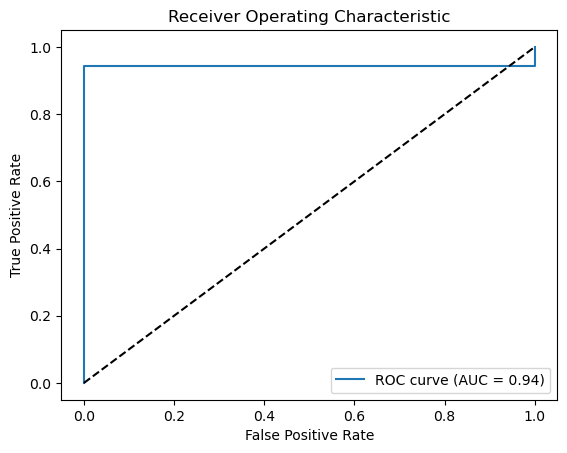

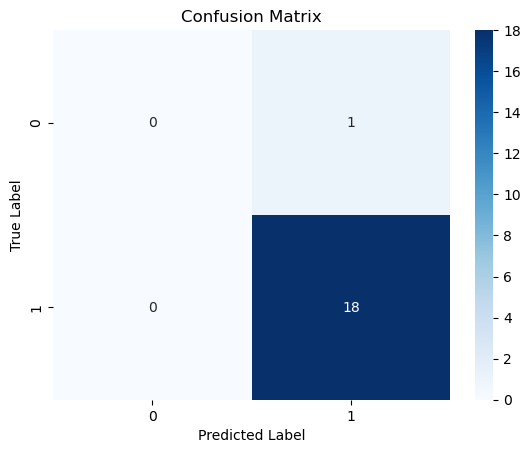

In [54]:
# Obtener las probabilidades de predicción
y_pred_prob_nn = best_model_nn.predict(X_test)

# Calcular la curva ROC y el AUC
fpr_nn, tpr_nn, thresholds_nn = roc_curve(y_test, y_pred_prob_nn)
auc_nn = roc_auc_score(y_test, y_pred_prob_nn)

# Paso 6: Graficar la curva ROC
plt.plot(fpr_nn, tpr_nn, label='ROC curve (AUC = {:.2f})'.format(auc_nn))
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

# Aplicar umbral a las probabilidades para obtener predicciones discretas
umbral = 0.5
y_pred_discreto_nn = np.where(y_pred_prob_nn >= umbral, 1, 0)


cm_nn = confusion_matrix(y_test, y_pred_discreto_nn)

# Visualize confusion matrix
sns.heatmap(cm_nn, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


### AdaBoost (Adaptative Boosting):

In [55]:
# Create the base estimator
base_estimator = DecisionTreeClassifier()

# Create the AdaBoost classifier
ada_boost = AdaBoostClassifier(base_estimator=base_estimator)

# Define the parameter grid for AdaBoost
param_grid_ab = {
    'n_estimators': [50, 100, 200], 
    'learning_rate': [0.1, 0.5, 1.0]  
}


# Perform grid search for AdaBoost
grid_search_ab = GridSearchCV(ada_boost, param_grid_ab, cv=3)
grid_search_ab.fit(X_train, y_train)

# Get the best AdaBoost model and its performance
best_ada_boost = grid_search_ab.best_estimator_
best_params_ab = grid_search_ab.best_params_
best_score_ab = grid_search_ab.best_score_

# Train the best AdaBoost model with all data
best_ada_boost.fit(X_train, y_train)

# Evaluate the best AdaBoost model
test_accuracy_ab = best_ada_boost.score(X_test, y_test)
print(f'Test Accuracy: {test_accuracy_ab*100:.2f}%')


Test Accuracy: 89.47%


In [56]:
best_params_ab

{'learning_rate': 0.1, 'n_estimators': 50}

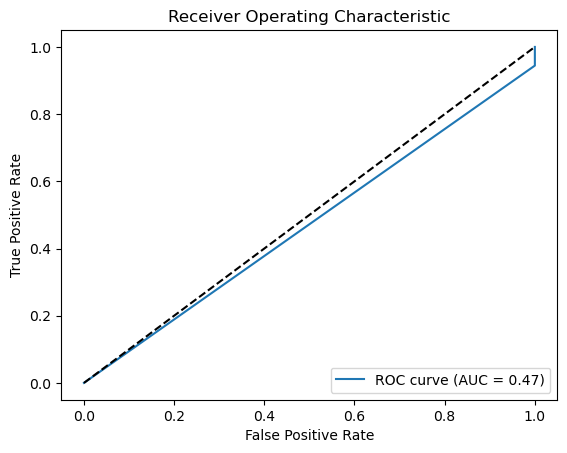

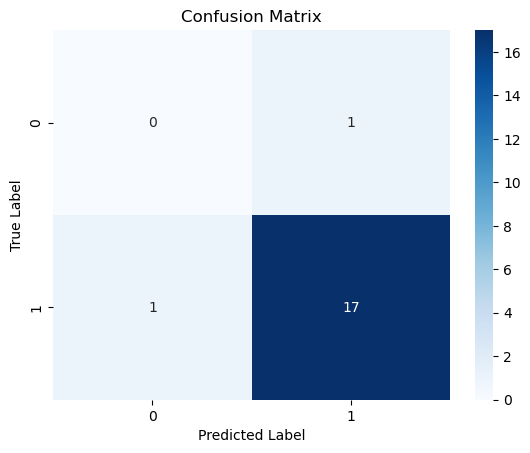

In [59]:
# Generate ROC curve and calculate AUC
y_pred_prob_ab = best_ada_boost.predict_proba(X_test)[:, 1]
fpr_ab, tpr_ab, thresholds_ab = roc_curve(y_test, y_pred_prob_ab)
auc_ab = roc_auc_score(y_test, y_pred_prob_ab)

# Plot ROC curve
plt.plot(fpr_ab, tpr_ab, label='ROC curve (AUC = {:.2f})'.format(auc_ab))
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

# Create confusion matrix
y_pred_ab = best_ada_boost.predict(X_test)
cm_ab = confusion_matrix(y_test, y_pred_ab)

# Visualize confusion matrix
sns.heatmap(cm_ab, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


### Gradient Boosting:

In [60]:
# Create the Gradient Boosting classifier
gradient_boosting = GradientBoostingClassifier()

# Define the parameter grid for Gradient Boosting
param_grid_gb = {
    'n_estimators': [50, 100, 200],        
    'learning_rate': [0.1, 0.5, 1.0],     
    'max_depth': [3, 4, 5]                 
}

# Perform grid search for Gradient Boosting
grid_search_gb = GridSearchCV(gradient_boosting, param_grid_gb, cv=3)
grid_search_gb.fit(X_train, y_train)

# Get the best Gradient Boosting model and its performance
best_gradient_boosting = grid_search_gb.best_estimator_
best_params_gb = grid_search_gb.best_params_
best_score_gb = grid_search_gb.best_score_

# Train the best Gradient Boosting model with all data
best_gradient_boosting.fit(X_train, y_train)

# Evaluate the best Gradient Boosting model
test_accuracy_gb = best_gradient_boosting.score(X_test, y_test)
print(f'Test Accuracy: {test_accuracy_gb*100:.2f}%')

Test Accuracy: 89.47%


In [61]:
best_params_gb

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}

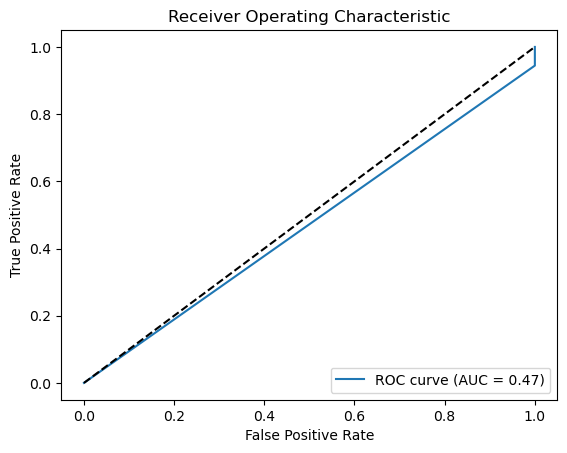

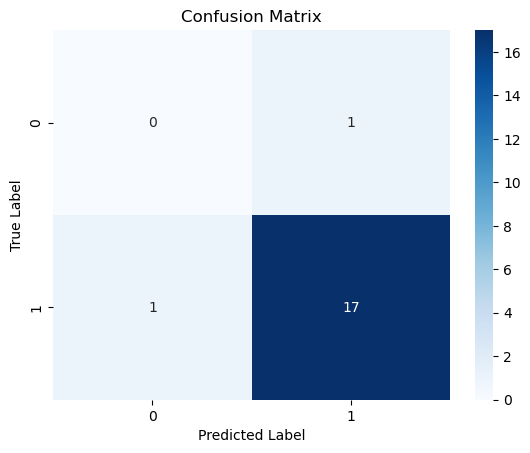

In [57]:
# Generate ROC curve and calculate AUC
y_pred_prob_gb = best_gradient_boosting.predict_proba(X_test)[:, 1]
fpr_gb, tpr_gb, thresholds_gb = roc_curve(y_test, y_pred_prob_gb)
auc_gb = roc_auc_score(y_test, y_pred_prob_gb)

# Plot ROC curve
plt.plot(fpr_gb, tpr_gb, label='ROC curve (AUC = {:.2f})'.format(auc_gb))
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

# Create confusion matrix
y_pred_gb = best_gradient_boosting.predict(X_test)
cm_gb = confusion_matrix(y_test, y_pred_gb)

# Visualize confusion matrix
sns.heatmap(cm_gb, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


#### Shap Values NN

In [58]:
import shap

In [59]:
# Inicializamoss SHAP explainer
explainer = shap.DeepExplainer(best_model_nn, X_train)
# Calculamos SHAP values
shap_values_nn = explainer.shap_values(X_test)

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


In [60]:
df.keys()

Index(['Age', 'Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss',
       'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring',
       'Itching', 'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity', 'class'],
      dtype='object')

In [61]:
df_shap_nn = pd.DataFrame(shap_values_nn[0], columns = df.keys()[:-1])
df_shap_nn.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity
0,0.000178,0.002140,0.000591,0.000248,0.000770,0.000977,0.001324,0.001529,0.002160,0.000423,-0.000307,0.002201,-0.000515,-0.000002,0.002934,0.000109
1,0.000196,0.002991,-0.001090,0.000418,-0.000780,-0.000968,-0.001057,0.002750,-0.001905,-0.000288,-0.000756,-0.000910,-0.001069,-0.000103,0.004739,-0.000049
2,0.000198,-0.001280,0.000871,0.000397,0.001136,0.001547,0.002073,-0.000266,-0.001753,-0.000275,-0.000683,-0.000936,0.002242,-0.000052,-0.000347,-0.000038
3,0.000190,-0.000978,0.000902,0.000454,0.000810,0.001318,-0.000929,-0.000198,0.002840,-0.000203,-0.000530,-0.000707,0.001900,-0.000107,-0.000230,0.003367
4,0.000147,0.001962,-0.000684,0.000376,0.000664,0.000955,0.001550,-0.000102,0.002252,0.000543,-0.000327,-0.000434,0.001499,-0.000053,0.003115,0.002666


In [62]:
mean_shap_nn = df_shap_nn.abs().mean().values
mean_shap_nn

array([0.00081065, 0.0039721 , 0.00203246, 0.00070851, 0.00160992,
       0.00224831, 0.00291186, 0.00194912, 0.00449794, 0.00087936,
       0.00263903, 0.0035597 , 0.00294301, 0.00015784, 0.00329147,
       0.00251276])

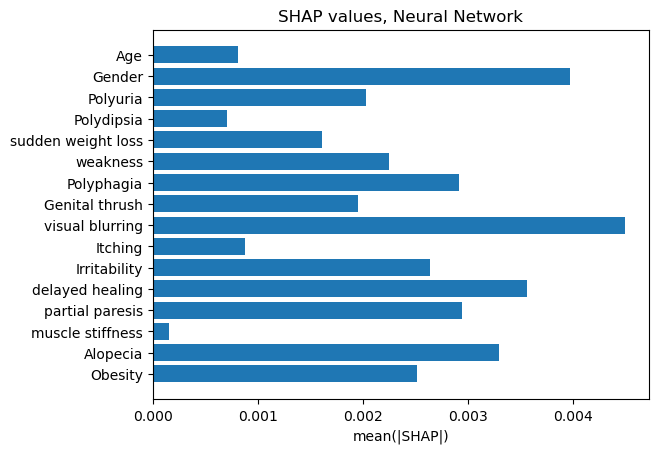

In [63]:
fig, ax = plt.subplots()

features = df.keys()[:-1]
y_pos = np.arange(len(features))

ax.barh(y_pos, mean_shap_nn, align='center')
ax.set_yticks(y_pos, labels=features)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('mean(|SHAP|)')
ax.set_title('SHAP values, Neural Network')

plt.show()
